In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic data (1D array)
original_data = np.random.rand(1000, 10)  # 1000 samples, each with 10 features

# Define the autoencoder model
input_dim = original_data.shape[1]
encoding_dim = 5  # Set the size of the encoding layer

# Encoder
encoder_input = layers.Input(shape=(input_dim,))
encoder_output = layers.Dense(encoding_dim, activation='relu')(encoder_input)
encoder_model = models.Model(encoder_input, encoder_output, name="encoder")

# Decoder
decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = layers.Dense(input_dim, activation='sigmoid')(decoder_input)
decoder_model = models.Model(decoder_input, decoder_output, name="decoder")

# Autoencoder (combined encoder and decoder)
autoencoder_input = layers.Input(shape=(input_dim,))
encoded_data = encoder_model(autoencoder_input)
decoded_data = decoder_model(encoded_data)
autoencoder_model = models.Model(autoencoder_input, decoded_data, name="autoencoder")

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
autoencoder_model.fit(original_data, original_data, epochs=50, batch_size=32, shuffle=True)

# Encode the original data
encoded_data = encoder_model.predict(original_data)

# Decode the encoded data
decoded_data = decoder_model.predict(encoded_data)

# Print the results
print("Original Data:")
print(original_data[0])
print("\nEncoded Data:")
print(encoded_data[0])
print("\nDecoded Data:")
print(decoded_data[0])





Epoch 1/50

32/32 [==============================] - 1s 944us/step - loss: 0.0835
Epoch 2/50
32/32 [==============================] - 0s 790us/step - loss: 0.0822
Epoch 3/50
32/32 [==============================] - 0s 791us/step - loss: 0.0815
Epoch 4/50
32/32 [==============================] - 0s 790us/step - loss: 0.0808
Epoch 5/50
32/32 [==============================] - 0s 866us/step - loss: 0.0800
Epoch 6/50
32/32 [==============================] - 0s 766us/step - loss: 0.0789
Epoch 7/50
32/32 [==============================] - 0s 810us/step - loss: 0.0775
Epoch 8/50
32/32 [==============================] - 0s 832us/step - loss: 0.0761
Epoch 9/50
32/32 [==============================] - 0s 827us/step - loss: 0.0748
Epoch 10/50
32/32 [==============================] - 0s 771us/step - loss: 0.0736
Epoch 11/50
32/32 [==============================] - 0s 785us/step - loss: 0.0724
Epoch 12/50
32/32 [==============================] - 0s 779us/step - loss: 0.0713
Epoch 13/50
32/32 [==

32/32 [==============================] - 0s 695us/step


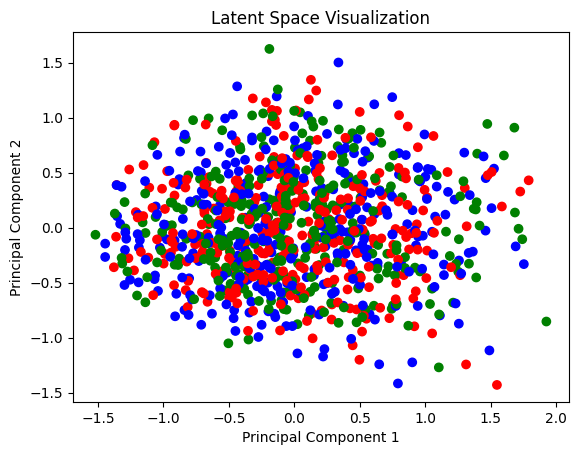

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Encode the original data into the latent space
encoded_data = encoder_model.predict(original_data)

# Apply PCA to reduce the dimensionality of the latent space for visualization
pca = PCA(n_components=2)
latent_space_representation = pca.fit_transform(encoded_data)

# Separate the data by original class labels
class_labels = np.random.randint(0, 3, size=(1000,))  # Example: Random class labels
colors = ['r', 'g', 'b']

# Plot the points in the latent space with different colors for each class
plt.scatter(latent_space_representation[:, 0], latent_space_representation[:, 1], c=[colors[label] for label in class_labels])
plt.title("Latent Space Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
